In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
df.shape

(891, 15)

In [11]:
df.duplicated().sum()

np.int64(107)

In [12]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [13]:
df1 = df.drop(columns=['embarked', 'class', 'deck', 'alive'], axis=1)

In [14]:
df1['age'].fillna(df1['age'].mean(), inplace=True)
df1['embark_town'].fillna(df1['embark_town'].mode()[0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7672\1868899696.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['age'].fillna(df1['age'].mean(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7672\1868899696.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [15]:
df1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [16]:
df1.drop_duplicates(inplace=True)

In [17]:
df1.duplicated().sum()

np.int64(0)

In [18]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


In [19]:
def category(age):
    if age <= 14:
        return 'Young'
    elif age <= 18:
        return 'Teen'
    elif age <= 30:
        return 'Adult Male'
    elif age <= 55:
        return 'Midle Age'
    else:
        return "Senior"

df1['Age_Category'] = df1['age'].apply(category)

In [20]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,Age_Category
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False,Adult Male
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False,Midle Age
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True,Adult Male
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False,Midle Age
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True,Midle Age


In [21]:
num = df1.select_dtypes(include=[int, float]).columns
cat = df1.select_dtypes(exclude=[int, float]).columns

print(num, '\n', cat)

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object') 
 Index(['sex', 'who', 'adult_male', 'embark_town', 'alone', 'Age_Category'], dtype='object')


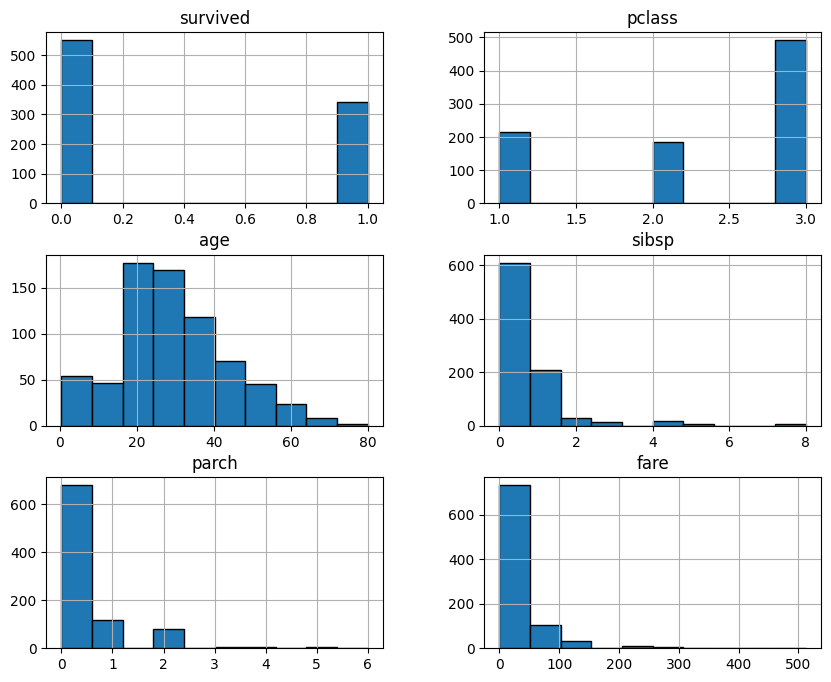

In [22]:
df.hist(figsize=(10,8), bins=10, edgecolor='k')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7672\3055388088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1, order = df1[col].value_counts().index, palette='Greens')


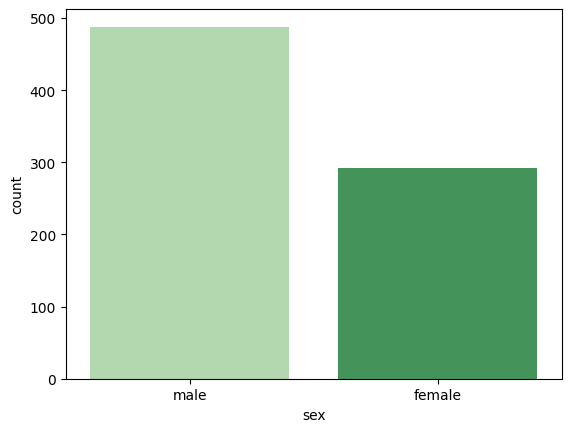

C:\Users\Admin\AppData\Local\Temp\ipykernel_7672\3055388088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1, order = df1[col].value_counts().index, palette='Greens')


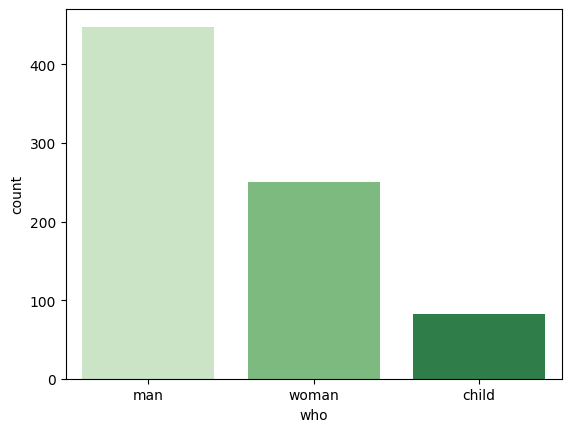

C:\Users\Admin\AppData\Local\Temp\ipykernel_7672\3055388088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1, order = df1[col].value_counts().index, palette='Greens')


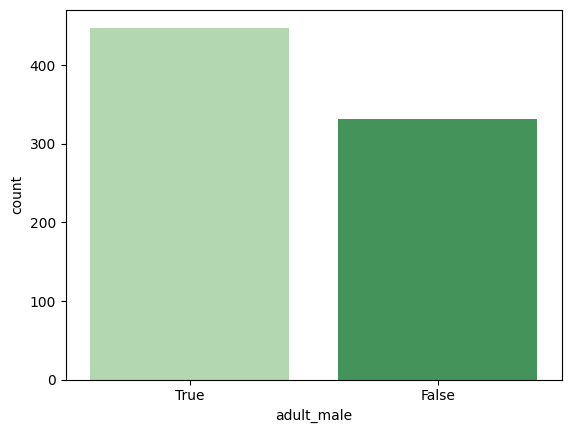

C:\Users\Admin\AppData\Local\Temp\ipykernel_7672\3055388088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1, order = df1[col].value_counts().index, palette='Greens')


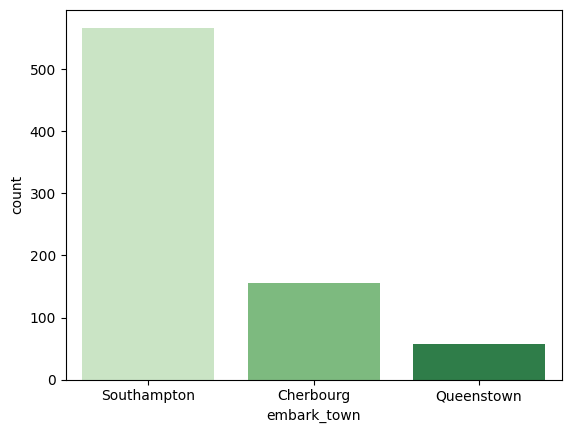

C:\Users\Admin\AppData\Local\Temp\ipykernel_7672\3055388088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1, order = df1[col].value_counts().index, palette='Greens')


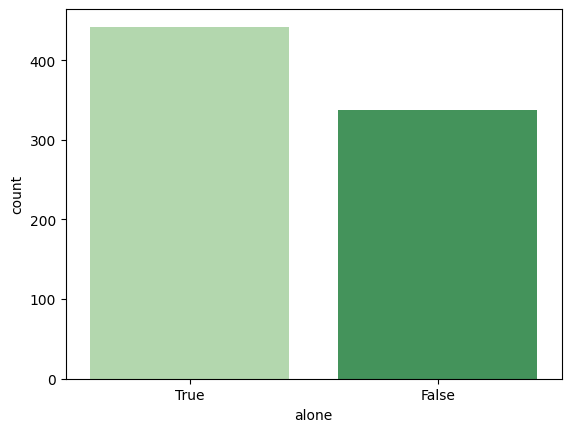

C:\Users\Admin\AppData\Local\Temp\ipykernel_7672\3055388088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df1, order = df1[col].value_counts().index, palette='Greens')


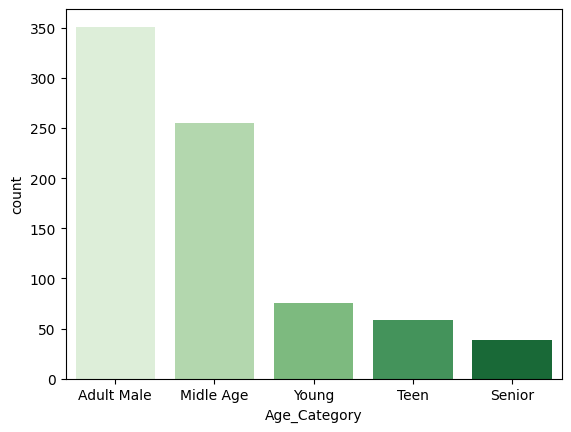

In [25]:
for col in cat:
    sns.countplot(x=col, data=df1, order = df1[col].value_counts().index, palette='Greens')
    plt.show()

In [26]:
df1['Age_Category'].value_counts()

Age_Category
Adult Male    351
Midle Age     255
Young          76
Teen           59
Senior         39
Name: count, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat:
    df1[col] = le.fit_transform(df1[col])

In [29]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,Age_Category
0,0,3,1,22.0,1,0,7.2500,1,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,2,0,0,0,1
2,1,3,0,26.0,0,0,7.9250,2,0,2,1,0
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,1
4,0,3,1,35.0,0,0,8.0500,1,1,2,1,1


In [30]:
x = df1.drop('survived', axis=1)
y = df1['survived']

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
from xgboost import XGBClassifier

In [36]:
#pip install xgboost

In [37]:
model = XGBClassifier(eval_metric='logloss')
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [38]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1])

In [41]:
from sklearn.metrics import accuracy_score, classification_report

Accuracy = accuracy_score(y_test, y_pred)*100
Classification_Report = classification_report(y_test, y_pred)

print("ACCuracy", Accuracy)
print("Classification Report\n", Classification_Report)

ACCuracy 78.84615384615384
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        91
           1       0.77      0.71      0.74        65

    accuracy                           0.79       156
   macro avg       0.78      0.78      0.78       156
weighted avg       0.79      0.79      0.79       156



In [43]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,Age_Category
0,0,3,1,22.0,1,0,7.2500,1,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,2,0,0,0,1
2,1,3,0,26.0,0,0,7.9250,2,0,2,1,0
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,1
4,0,3,1,35.0,0,0,8.0500,1,1,2,1,1


In [44]:
new_data= [[3,0,30,0,0,20,0,0,1,1,1]]

prediction = model.predict(new_data)
prediction[0]

np.int64(0)

In [ ]:
import joblib
joblib.dump(model, "Survival_Prediction.pkl")

In [ ]:
SP = joblib.load('Survival_Prediction.pkl')